# Envelopes Strategy

### Example of 100 candles of 15 min

In [336]:
#!pip install oandapyV20

In [337]:
#!pip install zulu

In [338]:
#!pip install mpl_finance

In [339]:
import pandas as pd
import oandapyV20
import oandapyV20.endpoints.instruments as instruments
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import datetime
import zulu

In [341]:
ID = '1XX-XXX-XXXXXXX-XX1'
token = '49XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX74'

In [342]:
client = oandapyV20.API(access_token=token)

In [343]:
params = {
          "count": 100,
          "granularity": "M15"}

In [344]:
r = instruments.InstrumentsCandles(instrument="EUR_USD",
                                   params=params)

In [345]:
rv = client.request(r)

In [346]:
dat = []
for oo in r.response['candles']:
    dat.append([oo['time'], oo['mid']['o'], oo['mid']['h'], oo['mid']['l'], oo['mid']['c']])

In [347]:
df = pd.DataFrame(dat)
df.columns = ['Time', 'Open', 'High', 'Low', 'Close']
df["Time"] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].apply(mpl_dates.date2num)
df = df.astype(float)
#df = df.set_index('Time')
df.head()

,Time,Open,High,Low,Close
0,737509.156250,1.08156,1.08174,1.08070,1.08094
1,737509.166667,1.08092,1.08098,1.08070,1.08078
2,737509.177083,1.08076,1.08138,1.08075,1.08086
3,737509.187500,1.08085,1.08085,1.08035,1.08049
4,737509.197917,1.08050,1.08122,1.08036,1.08120


In [348]:
plt.style.use('ggplot')

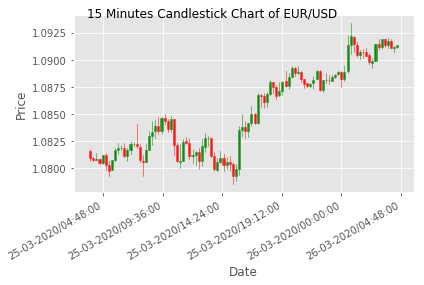

In [349]:
# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, df.values, width=0.007, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('15 Minutes Candlestick Chart of EUR/USD')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y/%H:%M:%S')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

## Envelope strategy on EURUSD

In [350]:
# To do only to start the dataset
params = {
        "from": "2010-04-01T00:00:00Z",
        "granularity": "M15"}

r = instruments.InstrumentsCandles(instrument="EUR_USD",
                                   params=params)

rv = client.request(r)

dat = []
for oo in r.response['candles']:
    dat.append([oo['time'], oo['mid']['o'], oo['mid']['h'], oo['mid']['l'], oo['mid']['c']])
    
eurusd = pd.DataFrame(dat)
eurusd.columns = ['Time', 'Open', 'High', 'Low', 'Close']
eurusd["Time"] = pd.to_datetime(eurusd['Time'])
Date = eurusd['Time']
eurusd['Time'] = eurusd['Time'].apply(mpl_dates.date2num)
eurusd = eurusd.astype(float)
eurusd.head()

,Time,Open,High,Low,Close
0,733863.000000,1.35269,1.35461,1.35233,1.35414
1,733863.010417,1.35412,1.35616,1.35376,1.35516
2,733863.020833,1.35519,1.35543,1.35445,1.35460
3,733863.031250,1.35462,1.35474,1.35260,1.35298
4,733863.041667,1.35298,1.35298,1.35179,1.35179


In [351]:
# Loop to feed the dataset with new rates
while Date.iloc[-1].year != 2020 or Date.iloc[-1].month != 3:
    
    last = Date.iloc[-1]
    inizio = last + datetime.timedelta(minutes=15)
    inizio = zulu.create(inizio.year, inizio.month, inizio.day, inizio.hour, inizio.minute)
    inizio = inizio.isoformat('T')+'Z'
    inizio = str(inizio[:-8] + 'Z')

    params = {
            "from": inizio,
            "granularity": "M15"}

    r = instruments.InstrumentsCandles(instrument="EUR_USD",
                                       params=params)

    rv = client.request(r)

    newDat = []
    for oo in r.response['candles']:
        newDat.append([oo['time'], oo['mid']['o'], oo['mid']['h'], oo['mid']['l'], oo['mid']['c']])
    
    newEurusd = pd.DataFrame(newDat)
    newEurusd.columns = ['Time', 'Open', 'High', 'Low', 'Close']
    newEurusd["Time"] = pd.to_datetime(newEurusd['Time'])
    Date = Date.append(newEurusd['Time'])
    newEurusd['Time'] = newEurusd['Time'].apply(mpl_dates.date2num)
    newEurusd = newEurusd.astype(float)
    eurusd = eurusd.append(newEurusd)

In [352]:
#First and Last Day of the dataset
print(eurusd.shape)
print(Date.iloc[0])
print(Date.iloc[-1])
print(eurusd.head(5))

(249500, 5)
2010-04-01 00:00:00
2020-03-04 03:00:00
            Time     Open     High      Low    Close
0  733863.000000  1.35269  1.35461  1.35233  1.35414
1  733863.010417  1.35412  1.35616  1.35376  1.35516
2  733863.020833  1.35519  1.35543  1.35445  1.35460
3  733863.031250  1.35462  1.35474  1.35260  1.35298
4  733863.041667  1.35298  1.35298  1.35179  1.35179
